In this example, we generate synthetic data to demonstrate the structural equation modelling (SEM) process and perform an analysis to illustrate the steps and output of SEM.

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 384.5 kB/s eta 0:00:00


In [50]:
import numpy as np
import pandas as pd
from semopy import Model, calc_stats

np.random.seed(42)
n_samples = 150

EE = np.random.normal(size=n_samples)
Unmodeled_EP = np.random.normal(size=n_samples)

a1 = 0.8
a2 = 0.5
b1 = 0.8
b2 = 0.3
b3 = 0.5

noise_scale = 3.0
noise_JS = np.random.normal(scale=noise_scale, size=n_samples)
JS = a1 * EE + noise_JS

noise_OC = np.random.normal(scale=noise_scale, size=n_samples)
OC = a2 * EE + noise_OC

noise_EP = np.random.normal(scale=noise_scale, size=n_samples)
EP = b1 * EE + b2 * JS + b3 * OC + noise_EP + Unmodeled_EP

measurement_error_std = np.sqrt(1 - 0.2**2)

EE1 = EE + np.random.normal(scale=measurement_error_std, size=n_samples)
EE2 = EE + np.random.normal(scale=measurement_error_std, size=n_samples)
EE3 = EE + np.random.normal(scale=measurement_error_std, size=n_samples)
EE4 = EE + np.random.normal(scale=measurement_error_std, size=n_samples)

JS1 = JS + np.random.normal(scale=measurement_error_std, size=n_samples)
JS2 = JS + np.random.normal(scale=measurement_error_std, size=n_samples)
JS3 = JS + np.random.normal(scale=measurement_error_std, size=n_samples)

OC1 = OC + np.random.normal(scale=measurement_error_std, size=n_samples)
OC2 = OC + np.random.normal(scale=measurement_error_std, size=n_samples)
OC3 = OC + np.random.normal(scale=measurement_error_std, size=n_samples)

EP1 = EP + np.random.normal(scale=measurement_error_std, size=n_samples)
EP2 = EP + np.random.normal(scale=measurement_error_std, size=n_samples)
EP3 = EP + np.random.normal(scale=measurement_error_std, size=n_samples)

data = pd.DataFrame({
    'EE1': EE1, 'EE2': EE2, 'EE3': EE3, 'EE4': EE4,
    'JS1': JS1, 'JS2': JS2, 'JS3': JS3,
    'OC1': OC1, 'OC2': OC2, 'OC3': OC3,
    'EP1': EP1, 'EP2': EP2, 'EP3': EP3
})

model_desc = '''
EE =~ EE1 + EE2 + EE3 + EE4
JS =~ JS1 + JS2 + JS3
OC =~ OC1 + OC2 + OC3
EP =~ EP1 + EP2 + EP3

JS ~ EE
OC ~ EE
EP ~ EE + JS + OC
'''


model = Model(model_desc)
res = model.fit(data)

estimates = model.inspect()
print("Parameter Estimates (Full DataFrame):")
print(estimates.head())


stats = calc_stats(model)
print("\nModel Fit Statistics:")
print(stats)


Parameter Estimates (Full DataFrame):
  lval op rval  Estimate  Std. Err   z-value   p-value
0   JS  ~   EE  0.662445  0.263159  2.517277  0.011827
1   OC  ~   EE  0.244479  0.251568   0.97182   0.33114
2   EP  ~   EE  0.803279   0.32708  2.455912  0.014053
3   EP  ~   JS  0.400148  0.103446  3.868181   0.00011
4   EP  ~   OC  0.501778  0.105089   4.77481  0.000002

Model Fit Statistics:
       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline      CFI  \
Value   60            78  71.808723      0.141326    2100.178149  0.99416   

            GFI      AGFI       NFI       TLI     RMSEA       AIC         BIC  \
Value  0.965808  0.955551  0.965808  0.992409  0.036344  61.04255  154.372244   

         LogLik  
Value  0.478725  


In [ ]:
!pip install graphviz


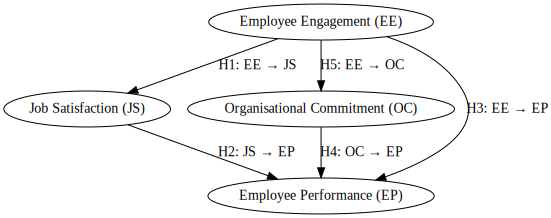

In [ ]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment="Structural Equation Model")

# Define the latent constructs (nodes)
dot.node("EE", "Employee Engagement (EE)")
dot.node("JS", "Job Satisfaction (JS)")
dot.node("OC", "Organisational Commitment (OC)")
dot.node("EP", "Employee Performance (EP)")

# Define the paths (edges) between latent constructs
dot.edge("EE", "JS", label="H1: EE → JS")
dot.edge("JS", "EP", label="H2: JS → EP")
dot.edge("EE", "EP", label="H3: EE → EP")
dot.edge("OC", "EP", label="H4: OC → EP")
dot.edge("EE", "OC", label="H5: EE → OC")

# Render the graph to a file as JPEG
dot.render("structural_model", format="jpeg")

# Display the graph directly in a Jupyter environment (optional)
dot
